**Lab 5: FIR Filtering 2**

The goal of this lab is to study the response of FIR filters to inputs such as complex exponentials and sinusoids. In the experiments of this lab, you will use `np.convolve()` to implement filters and `freqz()` to obtain the filter’s frequency response. As a result, you should learn how to characterize a filter by knowing how it reacts to different frequency components in the input.
This lab also introduces two practical filters: bandpass filters and nulling filters.
Bandpass filters can be used to detect and extract information from complex signals,
e.g., tones in a touch-tone telephone dialer. Nulling filters can be used to remove
sinusoidal interference, e.g., jamming signals in a radar.

In [18]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
from IPython.display import Audio
import matplotlib.pyplot as plt


from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, save_audio


1.1. First, let's replicate what we did until now. Copy the functions synthesize and envelope and obtain the synthesis from the last lab.

In [2]:
def envelope(x, N):
   x=np.abs(x)
   b=np.array([1/N]*N)
   return np.convolve(b,x,"same")

def synthesize(f0, phi, Ak, t, amplitude):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t +
    k*phi - (k-1)*np.pi/2)
    y = amplitude * y/np.amax(y) 
  return y



1.2 Plot both reference and synthesised signal.

In [3]:
og_reference, fs = load_audio("sis1_group4ukelele.wav")
Audio(og_reference, rate=fs)




In [4]:
s_syntt,fs= load_audio("s_synt_lab4.wav")
Audio(s_syntt, rate=fs)

In [5]:
plot_signals([og_reference,s_syntt], fs,name=["Reference Signal (S_ref)", "Synthesized Signal (S_synt)"])


---

**2. Averaging filter**

Now let's analyze the frequency response of the average filter used in the envelope function. The Scipy Python module has a function called *freqz()* for computing the frequency
response of a discrete-time LTI system. The following Python statements show how to
use freqz to compute and plot both the magnitude (absolute value) and the phase of
the frequency response of a four-point averaging system as a function of ω in the range − π ≤ ω ≤ π :

In [6]:
from util import plot_frequency_response

ww = np.arange(-np.pi, np.pi, np.pi/500)
_, HH = signal.freqz([1/4]*4, 1, ww)

plot_frequency_response(ww, HH)





For FIR filters, the second argument of `freqz(-, 1,- )` must always be equal to 1. The frequency vector ww should cover an interval of length 2π for ω , and its spacing must be fine enough to give a smooth curve for H(ejω) . Note: we will always use capital H for the frequency response.

    2.1 Use the `freqz` and `plot_frequency_response` functions to plot the frequency response of the averaging filter of your envelope function.



In [7]:
ww = np.arange(-np.pi, np.pi, np.pi/500)
_, HH = signal.freqz([1/51]*51, 1, ww)

plot_frequency_response(ww, HH)

2.2 Looking at the frequency responses, what are the main differences between your filter and the four-point averaging filter. What happens when the value N is increased?

**ok mañana**

---

**3. Nulling Filters for Rejection**

Nulling filters are filters that completely eliminate some frequency components. If the frequency is $\omega=0$ or $\omega=\pi$ then a two-point FIR filter will do the nulling. The simplest possible general nulling filter can have as few as three coefficients. If $\omega_n$ is the desired nulling frequency, then the following length-3 FIR filter

$$
y[n] = x[n] - 2\cos(\omega_n)x[n-1] + x[n-2] 
$$

will have a zero in its frequency response at $\omega=\omega_n$. For example, a filter designed to completely eliminate signals of the form $e^{j0.5\pi}$ would have the following coefficients because we would pick the desired nulling frequency to be $\omega_n = 0.5\pi$

$$
b_0 = 1, \quad b1=-2cos(\omega_n)=0, \quad b_2=1
$$

3.1 Use the following function to add an interference in your reference signal. Name the corrupted signal as `x_interf`.

In [8]:
def add_interference(x, fs):
  t = np.linspace(0, len(x)*1/float(fs), len(x))
  y = x + (np.amax(x)/10)*np.sin(2*np.pi*1000*t)
  return y

x_interf=add_interference(og_reference,fs)

3.2 Plot both the reference signal and the corrupted signal and listen to the latter one. 

In [9]:
plot_signals([og_reference,x_interf], fs,name=["Reference Signal (S_ref)", "Corrupted signal (x_interf)"])


In [10]:
Audio(x_interf,rate=fs)

3.3 Compare the spectrograms of the reference signal and the interference signal. 

(0.0, 2000.0)

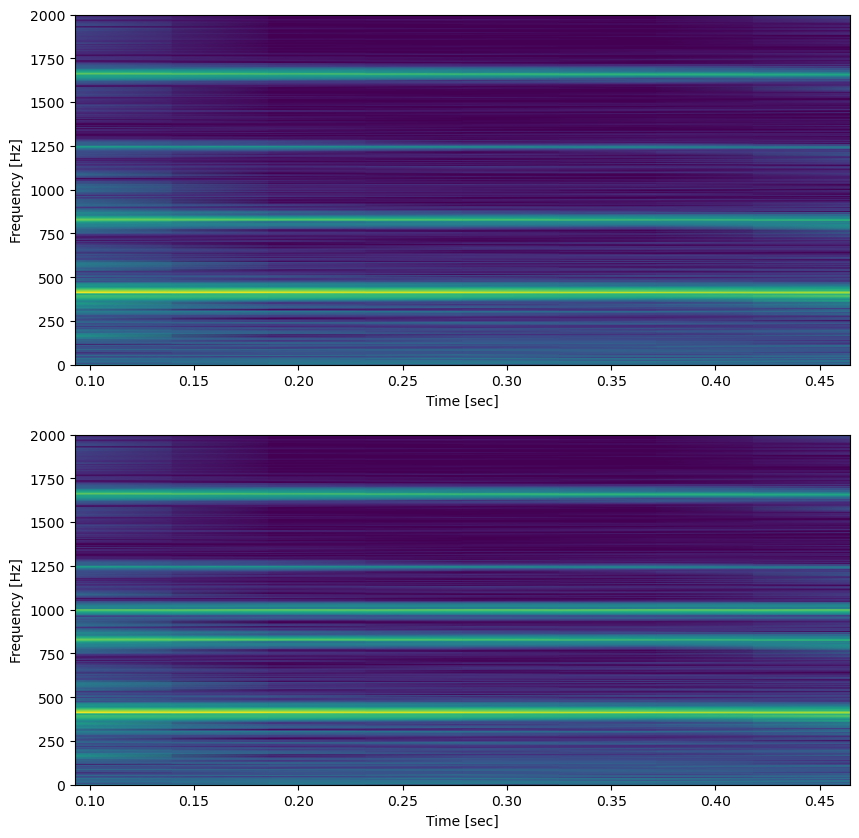

In [11]:
hop_length=4096
n_fft=8192

ff,tt,S=signal.spectrogram(og_reference,fs,nperseg=n_fft,noverlap=hop_length,nfft=n_fft)
ff,tt,Sy=signal.spectrogram(x_interf,fs,nperseg=n_fft,noverlap=hop_length,nfft=n_fft)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plot_spectrogram(ff,tt,S)
plt.ylim([0,2000])
plt.subplot(2,1,2)
plot_spectrogram(ff,tt,Sy)
plt.ylim([0,2000])

3.4. Create a function `remove_interference(x, fs)` that applies a nulling filter devised to remove the interference at 1000 Hz. 

Note: remember that a frequency can be converted to the normalized radian frequncy by: $\omega_n = 2\pi f_n/f_s$

In [12]:
def remove_interference(x, fs):
  """Applies nulling filter to remove an interference at 1000 Hz

  Parameters
  ----------
  x : np.array
      The input signal in the form of a numpy array
  fs : int or float
      Frequency rate in Hz

  Returns
  -------
  y : np.array
      The output of the filter

  """
  fn=1000
  wn=2*np.pi*fn/fs
  return np.convolve(x, [1,-2*np.cos(wn),1], "same")

3.5 Use the `remove_interference` funcion to clean the corrupted signal,  `x_interf`. Call the output as `x_clean`. Compare the spectrograms of both signals. Explain the result.

In [13]:
x_clean = remove_interference(x_interf, fs)

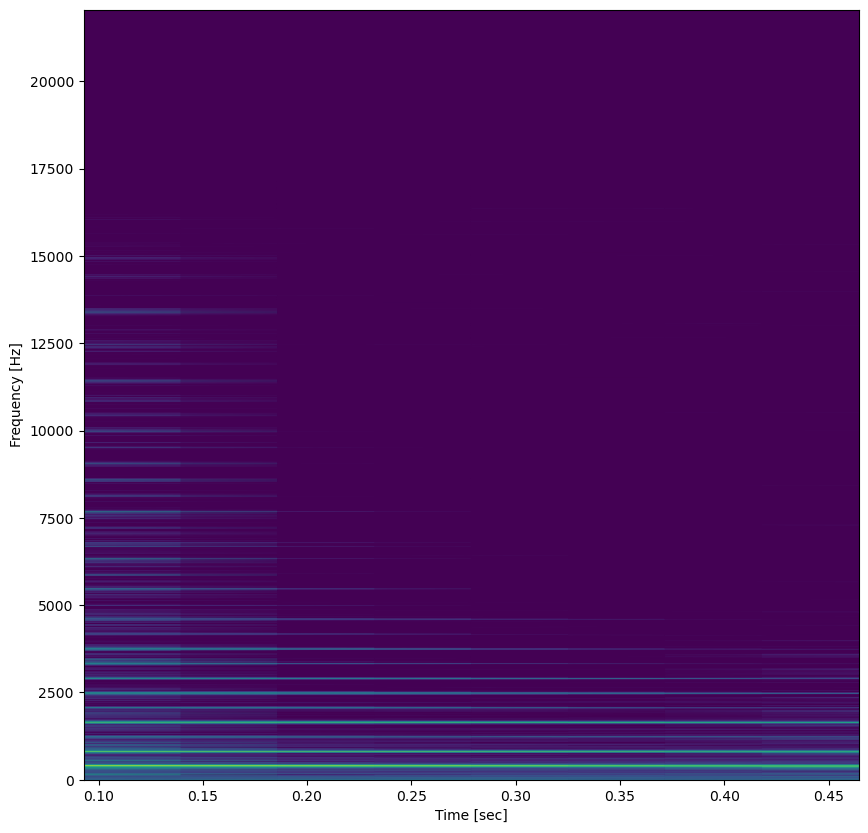

In [14]:
ff,tt,Sy=signal.spectrogram(x_clean,fs,nperseg=n_fft,noverlap=hop_length,nfft=n_fft)

plt.figure(figsize=(10,10))
plot_spectrogram(ff,tt,S)

In [ ]:
Audio(x_clean,rate=fs)
save_audio("clean_audio_lab4.wav",x_clean,fs)